<a href="https://colab.research.google.com/github/isaacgrove/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Assignment_DS_132_Intermediate_Linear_Algebra_IsaacGrove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Notes:
 
# If you use population variance and SD, you're going to end up with a corr coeff > 1. Use n - 1
# the rank of the matrix will tell you the span of the vectors. same answer for 7.1 and 5.2
# numpy has a function for matrix rank. don't need to do row reduction by hand
# 8.1 is a stretch

In [2]:
import numpy as np

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean = sum(sales) / len(sales)
print(mean)

3052.714285714286


In [3]:
# mean check
np.mean(sales)

3052.714285714286

In [4]:
# Variance is the average of the squared differences from the mean

def find_variance(input_array):
  list = []
  mean = sum(input_array) / len(input_array)
  for element in input_array:
    dist_from_mean_sq = (element - mean)**2
    list.append(dist_from_mean_sq)
  variance = sum(list) / (len(list) - 1) # just divide by len(list) to get population parameters
  return(variance)
  

find_variance(sales)

214387.90476190473

In [5]:
# population variance check
np.var(sales)

183761.06122448976

In [6]:
# sample variance check
np.var(sales, ddof=1)

214387.90476190473

In [8]:
# Std = sqrt(variance)

sales_variance = find_variance(sales)

sales_std = sales_variance**0.5
print(sales_std)

463.0204150595357


In [9]:
# population STD check
np.std(sales)

428.67360686714756

In [10]:
# sample STD check
np.std(sales, ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [11]:
customers = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales, customers)[0][1]
print(covariance)

7604.357142857142


In [12]:
# view array. Variance along main diagonal. Covariance elsewhere.
np.cov(sales, customers, ddof=1)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [13]:
customer_variance = find_variance(customers)

customer_std = customer_variance**0.5
print(customer_std)

17.057326313123664


In [14]:
# variance check
np.var(customers, ddof=1)

290.95238095238096

In [0]:
# FORMULA: r = cov(X,Y) / (stdX*stdY)

In [16]:
covariance / (sales_std*customer_std)

0.9628339778148909

In [17]:
# correlation check
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [18]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

print(df.shape)
df.head()


(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [19]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [20]:
# Include only numerical columns

subset = df.drop(columns=['name', 'sex', 'cabin', 'embarked', 'home.dest'])

subset.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,24160,211.3375,2,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,11,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,113781,151.5500,NaN,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,113781,151.5500,NaN,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,113781,151.5500,NaN,NaN,1


In [21]:
# Variance-covariance matrix

subset.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [22]:
# Correlation matrix

subset.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

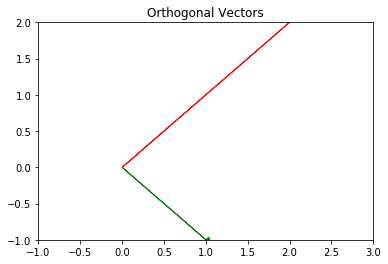

In [23]:
# synonym: perpendicular
import matplotlib.pyplot as plt

vector_1 = [3,3]
vector_2 = [1,-1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.1, head_length=0.1, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,2)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [24]:
# Check dot product
(-5*6)+(3*(-8))+(7*2)

# not orthogonal. Dot product =/= 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# They're all equal.

In [26]:
# Norm of c, squared.
(2**2 + (-15)**2 + 6**2 + 20**2)

665

In [27]:
# c dot c
2*2 + (-15*(-15)) + 6*6 + 20*20

665

In [28]:
# c.T * c
c = np.array([[2,-15,6,20]])
c.T

np.matmul(c,c.T)

array([[665]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [44]:
f = np.array([[4,12,11,9,2]])

f_norm = np.linalg.norm(f)

unit_f = f / f_norm

unit_f

array([[0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167]])


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

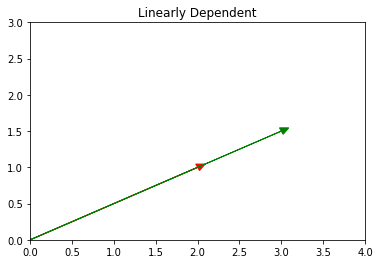

In [41]:
import matplotlib.pyplot as plt
dep_1 = [2,1]
dep_2 = [3,1.5]

plt.arrow(0,0,dep_1[0],dep_1[1], head_width=.1, head_length=.1, color='red')
plt.arrow(0,0, dep_2[0],dep_2[1], head_width=.1, head_length=.1, color='green')
plt.xlim(0,4)
plt.ylim(0,3)
plt.title('Linearly Dependent')
plt.show()

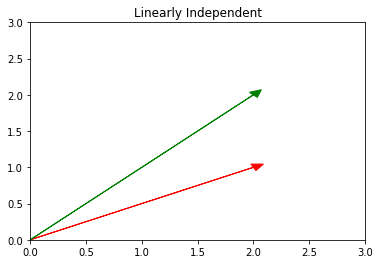

In [40]:
indep_1 = [2,1]
indep_2 = [2,2]

plt.arrow(0,0,indep_1[0],indep_1[1], head_width=.1, head_length=.1, color='red')
plt.arrow(0,0, indep_2[0],indep_2[1], head_width=.1, head_length=.1, color='green')
plt.xlim(0,3)
plt.ylim(0,3)
plt.title('Linearly Independent')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# The span is the line y = 2x 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

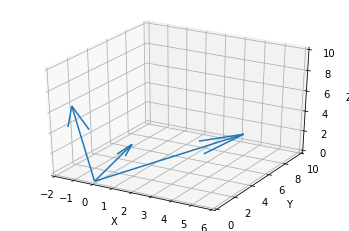

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

yellow = []
red = []
blue = []

vectors = np.array([[0, 0, 0, 1,2,3], 
                    [0, 0, 0, -1,0,7],
                    [0, 0, 0, 4,8,2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-2, 6])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


**The span is $\mathbb{R}^3$ because the 3 vectors are linearly independent**

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



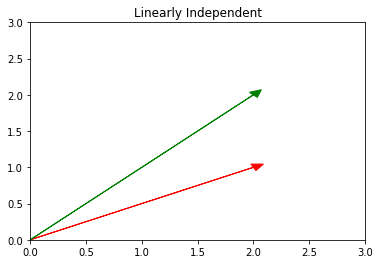

In [43]:
indep_1 = [2,1]
indep_2 = [2,2]

plt.arrow(0,0,indep_1[0],indep_1[1], head_width=.1, head_length=.1, color='red')
plt.arrow(0,0, indep_2[0],indep_2[1], head_width=.1, head_length=.1, color='green')
plt.xlim(0,3)
plt.ylim(0,3)
plt.title('Linearly Independent')
plt.show()

## 6.2 What does it mean to form a basis?

If a set of vectors are linearly independent and span a vector space (meaning that their linear combinations fill the space), they are said to form a basis for that space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [46]:
# rank of P = 3

p = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of vector space its columns span. You can't just use the dimensionality of the matrix for this, because there could be redundant (linearly dependent) vectors.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# considered a stretch goal

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

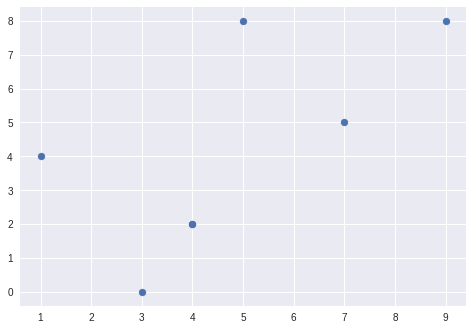

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()